In [78]:
import pandas as pd
df=pd.read_csv("MOCK_DATA.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,DGN3,2.22,1.36,PRZ0,F,F,F,F,F,OC12,T,F,F,T,F,63,T
1,DGN2,2.72,2.08,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,67,F
2,DGN3,2.07,1.60,PRZ0,F,T,F,F,F,OC12,F,F,F,F,F,77,F
3,DGN3,3.56,2.76,PRZ1,F,F,F,T,F,OC12,F,F,F,T,F,74,F
4,DGN3,2.00,1.52,PRZ0,F,T,F,T,F,OC14,T,F,F,T,F,60,F


In [79]:
df.shape

(500, 17)

In [80]:
df.groupby(df.iloc[:,16]).count().T.head()

16,F,T
0,337,163
1,337,163
2,337,163
3,337,163
4,337,163


In [81]:
numeric=df.iloc[:,[1,2,15]]
numeric.head()

,1,2,15
0,2.22,1.36,63
1,2.72,2.08,67
2,2.07,1.60,77
3,3.56,2.76,74
4,2.00,1.52,60


In [82]:
object1=pd.DataFrame(df.iloc[:,0])
object2=df.iloc[:,3:15]
objects=pd.concat([object1,object2],axis=1)
objects.head()

,0,3,4,5,6,7,8,9,10,11,12,13,14
0,DGN3,PRZ0,F,F,F,F,F,OC12,T,F,F,T,F
1,DGN2,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F
2,DGN3,PRZ0,F,T,F,F,F,OC12,F,F,F,F,F
3,DGN3,PRZ1,F,F,F,T,F,OC12,F,F,F,T,F
4,DGN3,PRZ0,F,T,F,T,F,OC14,T,F,F,T,F


In [83]:
y=pd.DataFrame(df.iloc[:,16]).rename(columns={16:"Risk"})
y.head()

,Risk
0,T
1,F
2,F
3,F
4,F


In [84]:
from sklearn.preprocessing import LabelEncoder
y=pd.DataFrame(LabelEncoder().fit_transform(y)).rename(columns={0:"Risk"})
y.head()

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Risk
0,1
1,0
2,0
3,0
4,0


In [85]:
objects=objects.apply(LabelEncoder().fit_transform)
objects

,0,3,4,5,6,7,8,9,10,11,12,13,14
0,1,0,0,0,0,0,0,1,1,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,0,0
3,1,1,0,0,0,1,0,1,0,0,0,1,0
4,1,0,0,1,0,1,0,3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,0,0,0,0,0,0,0,0,0,0,1,0
496,1,1,0,0,0,1,0,1,0,0,0,1,0
497,1,1,0,0,0,1,0,1,0,0,0,1,0
498,1,1,0,1,0,1,0,1,0,0,0,1,0


In [86]:
X=pd.concat([numeric,objects],axis=1)
X.head()

,1,2,15,0,3,4,5,6,7,8,9,10,11,12,13,14
0,2.22,1.36,63,1,0,0,0,0,0,0,1,1,0,0,1,0
1,2.72,2.08,67,0,0,0,0,0,0,0,1,0,0,0,1,0
2,2.07,1.60,77,1,0,0,1,0,0,0,1,0,0,0,0,0
3,3.56,2.76,74,1,1,0,0,0,1,0,1,0,0,0,1,0
4,2.00,1.52,60,1,0,0,1,0,1,0,3,1,0,0,1,0


In [10]:
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest=RandomForestClassifier(n_estimators=250,criterion="entropy",max_depth=12,min_samples_split=4,min_samples_leaf=1,max_features="sqrt",bootstrap=True,n_jobs=-1,warm_start=False,class_weight="balanced_subsample",ccp_alpha=0.006,random_state=0).fit(X,y)
scores=cross_val_score(forest,X,np.asarray(y).reshape(500,),cv=10)

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [11]:
print("Accuracy: ",scores.mean())

Accuracy:  0.946


In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(forest, X, np.asarray(y).reshape(500,), cv=10)
AUC = roc_auc_score(y, y_pred)

In [13]:
print("AUC: ",AUC)

AUC:  0.9345997706213249


In [14]:
from sklearn.ensemble import GradientBoostingClassifier
gradient=GradientBoostingClassifier(loss="exponential",learning_rate=0.07,n_estimators=210,subsample=0.45,criterion="mse",min_samples_split=3,min_samples_leaf=3,max_depth=3,max_features="auto",ccp_alpha=0.001,random_state=0).fit(X,y)
scores=cross_val_score(gradient,X,np.asarray(y).reshape(500,),cv=10)
print("Accuracy: ",scores.mean())

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy:  0.932


In [15]:
y_pred = cross_val_predict(gradient, X, np.asarray(y).reshape(500,), cv=10)
AUC = roc_auc_score(y, y_pred)
print("AUC: ", AUC)

AUC:  0.911543572845934


In [51]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=1,weights="uniform",algorithm="auto",leaf_size=30,p=1,n_jobs=-1).fit(X,y)
scores=cross_val_score(KNN,X,np.asarray(y).reshape(500,),cv=8)
print("Accuracy: ",scores.mean())

Accuracy:  0.9479326676907323


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [52]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(KNN, X, np.asarray(y).reshape(500,), cv=8)
AUC = roc_auc_score(y, y_pred)
print("AUC: ",AUC)

AUC:  0.9329158398718391


In [88]:
df=pd.read_csv("Thoracic surgery dataset.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [89]:
numeric=df.iloc[:,[1,2,15]]
numeric.head()

,1,2,15
0,2.88,2.16,60
1,3.40,1.88,51
2,2.76,2.08,59
3,3.68,3.04,54
4,2.44,0.96,73


In [90]:
object1=pd.DataFrame(df.iloc[:,0])
object2=df.iloc[:,3:15]
objects=pd.concat([object1,object2],axis=1)
objects.head()

,0,3,4,5,6,7,8,9,10,11,12,13,14
0,DGN2,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F
1,DGN3,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F
2,DGN3,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F
3,DGN3,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F
4,DGN3,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F


In [91]:
y=pd.DataFrame(df.iloc[:,16]).rename(columns={16:"Risk"})
y.head()

,Risk
0,F
1,F
2,F
3,F
4,T


In [92]:
y=pd.DataFrame(LabelEncoder().fit_transform(y)).rename(columns={0:"Risk"})
y.head()

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Risk
0,0
1,0
2,0
3,0
4,1


In [93]:
objects=objects.apply(LabelEncoder().fit_transform)
objects

,0,3,4,5,6,7,8,9,10,11,12,13,14
0,1,1,0,0,0,1,1,3,0,0,0,1,0
1,2,0,0,0,0,0,0,1,0,0,0,1,0
2,2,1,0,0,0,1,0,0,0,0,0,1,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0
4,2,2,0,1,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1,1,0,0,0,1,0,2,0,0,0,1,0
466,2,0,0,0,0,0,0,0,0,0,0,1,0
467,2,1,0,0,0,1,0,2,0,0,0,0,0
468,2,1,0,0,0,1,1,1,0,0,0,1,0


In [94]:
X=pd.concat([numeric,objects],axis=1)
X.head()

,1,2,15,0,3,4,5,6,7,8,9,10,11,12,13,14
0,2.88,2.16,60,1,1,0,0,0,1,1,3,0,0,0,1,0
1,3.40,1.88,51,2,0,0,0,0,0,0,1,0,0,0,1,0
2,2.76,2.08,59,2,1,0,0,0,1,0,0,0,0,0,1,0
3,3.68,3.04,54,2,0,0,0,0,0,0,0,0,0,0,0,0
4,2.44,0.96,73,2,2,0,1,0,1,1,0,0,0,0,1,0


In [95]:
from sklearn.metrics import accuracy_score
y_pred=forest.predict(X)
print("Accuracy from the Random Forest model: ",accuracy_score(y,y_pred))

Accuracy from the Random Forest model:  0.8085106382978723


In [96]:
print("AUC from the Random Forest model: ",roc_auc_score(y,y_pred))

AUC from the Random Forest model:  0.8403571428571428


In [97]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix from the Random Forest model: \n",confusion_matrix(y,y_pred))

Confusion matrix from the Random Forest model: 
 [[318  82]
 [  8  62]]


In [98]:
print("Random Forest model: \n")
print("True positive rate: ",62/(62+8))
print("True negative rate: ",318/(318+82))

Random Forest model: 

True positive rate:  0.8857142857142857
True negative rate:  0.795


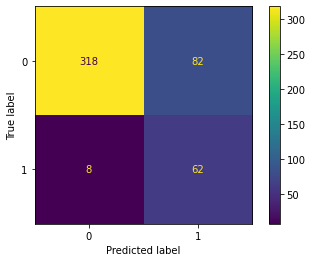

In [99]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(forest,X,y)
plt.show()

In [101]:
y_pred=gradient.predict(X)
print("Accuracy from the Gradient Boosting model: ",accuracy_score(y,y_pred))

Accuracy from the Gradient Boosting model:  0.7723404255319148


In [102]:
print("AUC from the Gradient Boosting model: ",roc_auc_score(y,y_pred))

AUC from the Gradient Boosting model:  0.7896428571428571


In [103]:
print("Confusion matrix from the Gradient Boosting model: \n",confusion_matrix(y,y_pred))

Confusion matrix from the Gradient Boosting model: 
 [[306  94]
 [ 13  57]]


In [104]:
print("Gradient Boosting model: \n")
print("True positive rate: ",57/(57+13))
print("True negative rate: ",306/(306+94))

Gradient Boosting model: 

True positive rate:  0.8142857142857143
True negative rate:  0.765


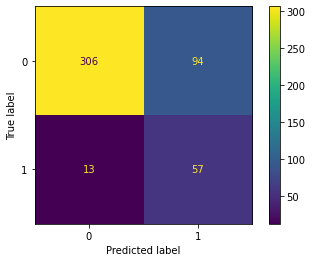

In [105]:
plot_confusion_matrix(gradient,X,y)
plt.show()

In [106]:
y_pred=KNN.predict(X)
print("Accuracy from the K Nearest Neighbor model: ",accuracy_score(y,y_pred))

Accuracy from the K Nearest Neighbor model:  0.8319148936170213


In [107]:
print("AUC from the K Nearest Neighbor model: ",roc_auc_score(y,y_pred))

AUC from the K Nearest Neighbor model:  0.8717857142857142


In [108]:
print("Confusion matrix from the K Nearest Neighbor model: \n",confusion_matrix(y,y_pred))

Confusion matrix from the K Nearest Neighbor model: 
 [[326  74]
 [  5  65]]


In [109]:
print("K Nearest Neighbor model: \n")
print("True positive rate: ",65/(65+5))
print("True negative rate: ",326/(326+74))

K Nearest Neighbor model: 

True positive rate:  0.9285714285714286
True negative rate:  0.815


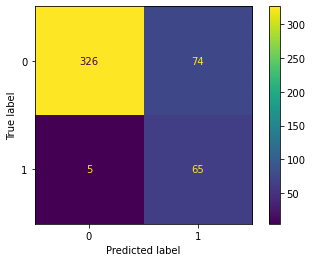

In [110]:
plot_confusion_matrix(KNN,X,y)
plt.show()